A neural network is an interconnected group of nodes, akin to te vast network of neurons in a brain.

We start by generating a dataset (through scikit-learn).

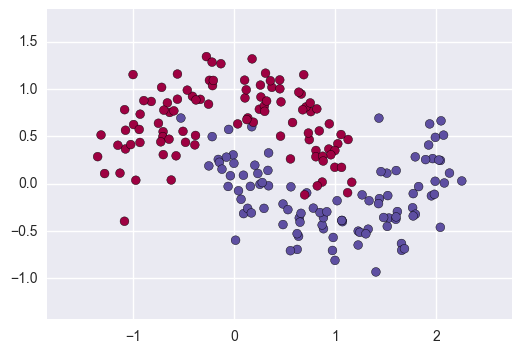

In [1]:
# Generate a dataset and plot it
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegressionCV
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline

# make dataset and plot points
np.random.seed(0)
X, y = make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

# plot asthetics
sns.set(style="whitegrid")
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

The dataset we have generated has two classes, plotted as red and blue points.  Our goal is to train a machine learning classifier that predicts the correct class of each point, given the $x$- and $y$-coordinates.  

We begin by training a Logistic Regression classifier, which we recall is a linear classifier.  Since the classes are not linearly separable, we won't be able to classify each point perfectly and will focus on just doing as well as we can.  Of course, we could engineer features to plot the points in a different space (where the classes are linearly separable), to achieve perfect classification.

We won't do this here, and we note that neural networks will never require any feature engineering!

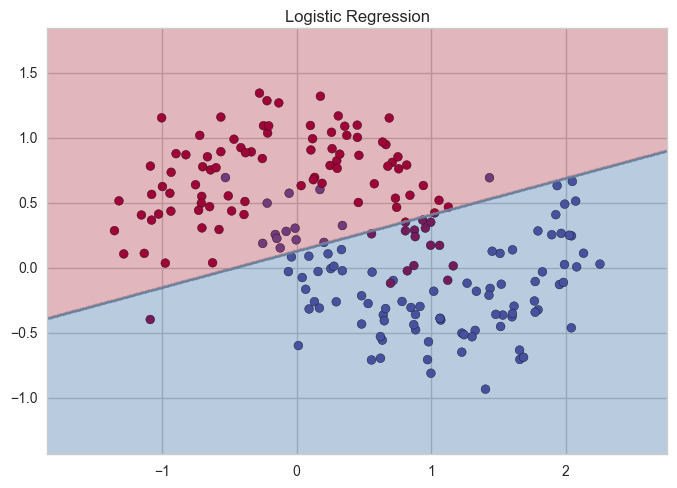

In [2]:
# Train the logistic rgeression classifier
clf = LogisticRegressionCV()
clf.fit(X, y)
    
def plot_decision_boundary():
    ax = plt.gca()
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = ax.contourf(xx, yy, Z, cmap='RdBu', alpha=.3)
    cs2 = ax.contour(xx, yy, Z, cmap='RdBu', alpha=.3)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
# Plot points
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

# Plot the decision boundary
plot_decision_boundary()
plt.title("Logistic Regression")
plt.show()

The graph above shows the decision boundary of the Logistic Regression classifier.  In some sense, this is the best we can do in separating the points with a straight line.

We now build a 3-layer neural network with one input layer, one hidden layer, and one output layer.  The input layer contains 2 nodes, determined by the dimensionality of our dataset.  Likewise, the output layer contains 2 nodes, one for each class.

As for the dimensionality of the hidden layer, this is flexible.  We note that more nodes in the hidden layer permit modeling of more complex functions; however, the higher dimensionality comes with the risk of overfitting, and more computation will be necessary (that is: we sacrifice speed).  Choosing the number of nodes in the hidden layer is more art than science, and so we will have to experiment!

We also need to choose **activation functions** for each layer (with the exception of the input layer), which transforms the inputs of the layer into its outputs.  Common choices are tanh (the sigmoid function), ReLUs, and softmax.

For the hidden layer, we choose tanh.  Because we want our network to output probabilities, for the output layer, we choose softmax (converts raw scores to probabilities).

Let $D$ denote the number of nodes of our hidden layer.  then our network makes predictions using forward propagation according to the following formulas:

$$
\vec{z}_1 = W_1 \vec{x} + \vec{b}_1 \\
\vec{a}_1 = \tanh(\vec{z}_1)\\
\vec{z}_2 = W_2 \vec{a_1} + \vec{b}_2\\
\vec{a}_2 = \text{softmax}(\vec{z}_2)
$$

where:
- $\vec{x} \in \mathbb{R}^2$ is the 2-dimensional input to our network
- $\vec{z}_1 \in \mathbb{R}^D$ is the output of the hidden layer **before** applying the activation function
- $\vec{a}_1 \in \mathbb{R}^D$ is the output of the hidden layer **after** applying the activation function (... _it is also the input to the output layer_)
- $\vec{z}_2 \in \mathbb{R}^{2}$ is the output of the output layer **before** applying the activation function
- $\vec{a}_2 \in \mathbb{R}^2$ is the output of the output layer **after** applying the activation function (also our prediction $\hat{y}$)

and $W_1 \in \mathbb{R}^{D \times 2}$, $\vec{b}_1 \in \mathbb{R}^{D}$, $W_2 \in \mathbb{R}^{2 \times D}$, $\vec{b}_2 \in \mathbb{R}^2$ are the parameters that transform data between the layers of the network.  We have to learn their values from the data.  We need to find parameters that minimize the error on our training data.  Note how the number of parameters scales with the dimension of the hidden layer.

We call the function that measures our error the loss function.  A common choice for defining error in networks with softmax output is the **cross-entropy loss**.  If we have $N$ training examples and $C$ classes, then the loss for prediction $\hat{y}$ with respect to the true lables $y$ is given by:
$$
L(y, \hat{y}) = - \frac{1}{N}\sum_{n=1}^N\sum_{i=1}^C y_{n,i}\log\hat{y}_{n,i}
$$

What is the motivation for this loss function?  

Now, all that is left is to calculate the partial derivatives with respect to each variable and implement gradient descent (in batches, for speed) to arrive at the correct parameters.

Recurrent Neural Networks (RNNs) are popular models that have shown great promise in many Natural Language Processing (NLP) tasks.

Long Short Term Memory networks (LSTMs) are a special kind of RNN, capable of learning long-term dependencies.  That is, they remember information for long periods of time.

Sources
    - https://en.wikipedia.org/wiki/Artificial_neural_network
    - http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/
    - http://colah.github.io/posts/2015-08-Understanding-LSTMs/
    - http://www.wildml.com/2015/09/recurrent-neural-networks-tutorial-part-1-introduction-to-rnns/